## DSC 540
### Term Paper

**Author:** Kimberly Cable

**Semester:** Summer, 2022

## Milestone 1

### About

National Parks in the United States are a favorite vacation destination for many outdoor enthusiasts.  I would like to find out which of the National Parks is best to visit and hike. 

### Plan of Attack

Each of the three data sources has its own unique information but also some overlap.  The National Parks API has all information about each of the national parks in its system. The National Parks Trails CSV is derived from the AllTrails website and has information on the trails located in the National Parks. The National Parks elevation table from Wikipedia is a table of the highest and lowest elevations in 63 National Parks.
Initially. looking at the data for each source, the National Parks API looks to be the parent as it has the most accurate information coming directly from the National Parks Service. I will be using the park’s endpoint to get data about all the National Parks in its database. The CSV file contains the name of the National Park which I will use to connect it to the API data.  The website also has the National Park name which will connect to the API data.

I do not see any major ethical implications for my study.  It is looking at trails in the National  Parks.  It does have information such as user rankings and popularity ranks.  These can be very subjective and what one person likes in a trail is not always what another person likes.

Some of the challenges I see, is the National Park name may be misspelled or spelled differently in each data source.  Also, there is also duplicate information that needs to be consolidated. Many of the fields need to be converted to their appropriate type and checked for empty cells and the website has data that looks different in some of the columns which will need to be fixed.


## Data Sources

* National Park Service API
    1. This API has information about each of the National Parks in the United States.  Information such as facilities, locations, activities, descriptions, etc.
    2. https://www.nps.gov/subjects/developer/api-documentation.htm
* National Park Trails – CSV file
    1. List of trails in the National Parks. Information such as trail names, which National Park it is in, elevation, difficulty, etc.
    2. https://www.kaggle.com/datasets/planejane/national-park-trails
* Website: List of national parks of the United States by elevation
    1. Wikipedia page of the highest and lowest points in each of the United States National Parks.
    2. https://en.wikipedia.org/wiki/List_of_national_parks_of_the_United_States_by_elevation


### Relationships

* API: Contains json data per National Park.  
    1. Key: data.fullName
* CSV file: Contains 1 row per trail
    1. Key: Column Name: area_name
* Website: Contains 1 row per national park
    1. Key: Column Name: Park
* All Three:
    1. All related by National Park name
    2. API to CSV has a 1 to many relationship with fullName to area_name as key
    3. API to Website has 1 to 1 relationship with fullName to name.

### Data Dictionary

#### National Park Trails - CSV file
#### (18 columns x 3313 rows)

| Column | Description |
|--------|-------------|
| trail_id | Unique trail id |
| name | Name of the trail |
| area_name | Name of the National Park trail is located |
| city_name | Name of the city the trail is located |
| state_name | Name of the state the trail is located |
| country_name | Name of the country the trail is located |
| _geoloc | Latitude and longitude (key-value) of the trails location |
| popularity | Popularity (%) of the trail |
| length | Length in feet of the trail |
| elevation_gain | Elevation gain of the trail |
| difficulty_rating | Difficulty rating (1 – 5) of the trail |
| route_type | Route type: out and back, loop, point to point |
| visitor_usage | Visitor usage rating: light, moderate, heavy |
| avg_rating | Average rating (1 to 5) – can be ½ stars |
| num_reviews | Number of reviews |
| features | Array of features the trail has |
| activities | Array of the activities a trail has |
| units | Units: i or m |


#### List of national parks of the United States by elevation (Wikipedia Website)
#### (9 columns x 63 rows)

| Column | Description |
|--------|-------------|
| Rank | Rank of national park in terms of highest elevation |
| Park | Name of National Park |
| Location | Image of State Flag. \<img alt\> has name of state, can be multiple states |
| Peak name | Name of the highest peak – can be a sentence and has annotations |
| Mountain Range | Name of the Mountain Range of peak |
| Elevation | Elevation of the highest peak in feet and meters |
| Location of lowest point | Name of the lowest elevation point |
| Minimum elevation | Lowest elevation in feet and meters |
| Vertical relief | Vertical feet and meters |

#### National Parks  API (API: json data)
#### (466 rows)

In [1]:
%%capture
'''
Example Response:

{
    "total": "466",
    "limit": "600",
    "start": "0",
    "data": [
        {
            "id": "77E0D7F0-1942-494A-ACE2-9004D2BDC59E",
            "url": "https://www.nps.gov/abli/index.htm",
            "fullName": "Abraham Lincoln Birthplace National Historical Park",
            "parkCode": "abli",
            "description": "For over a century people from around the world have come to rural Central Kentucky to honor the humble beginnings of our 16th president, Abraham Lincoln. His early life on Kentucky's frontier shaped his character and prepared him to lead the nation through Civil War. The country's first memorial to Lincoln, built with donations from young and old, enshrines the symbolic birthplace cabin.",
            "latitude": "37.5858662",
            "longitude": "-85.67330523",
            "latLong": "lat:37.5858662, long:-85.67330523",
            "activities": [
                {
                    "id": "13A57703-BB1A-41A2-94B8-53B692EB7238",
                    "name": "Astronomy"
                },
                {
                    "id": "D37A0003-8317-4F04-8FB0-4CF0A272E195",
                    "name": "Stargazing"
                }
            ],
            "topics": [
                {
                    "id": "D10852A3-443C-4743-A5FA-6DD6D2A054B3",
                    "name": "Birthplace"
                },
                {
                    "id": "F669BC40-BDC4-41C0-9ACE-B2CD25373045",
                    "name": "Presidents"
                }
            ],
            "states": "KY",
            "contacts": {
                "phoneNumbers": [
                    {
                        "phoneNumber": "2703583137",
                        "description": "",
                        "extension": "",
                        "type": "Voice"
                    },
                    {
                        "phoneNumber": "2703583874",
                        "description": "",
                        "extension": "",
                        "type": "Fax"
                    }
                ],
                "emailAddresses": [
                    {
                        "description": "",
                        "emailAddress": "ABLI_Administration@nps.gov"
                    }
                ]
            },
            "entranceFees": [
                {
                    "cost": "0.00",
                    "description": "There is no fee associated with visiting either unit of the park.",
                    "title": "Fee Free Park"
                }
            ],
            "entrancePasses": [],
            "fees": [],
            "directionsInfo": "The Birthplace Unit of the park is located approximately 2 miles south of the town of Hodgenville on U.S. Highway 31E South. The Boyhood Home Unit at Knob Creek is located approximately 10 miles northeast of the Birthplace Unit of the park.",
            "directionsUrl": "http://www.nps.gov/abli/planyourvisit/directions.htm",
            "operatingHours": [
                {
                    "exceptions": [
                        {
                            "exceptionHours": {},
                            "startDate": "2022-11-24",
                            "name": "Park is Closed",
                            "endDate": "2022-11-24"
                        },
                        {
                            "exceptionHours": {},
                            "startDate": "2022-12-26",
                            "name": "Park is Closed",
                            "endDate": "2022-12-26"
                        },
                        {
                            "exceptionHours": {},
                            "startDate": "2023-01-02",
                            "name": "Park is Closed",
                            "endDate": "2023-01-02"
                        }
                    ],
                    "description": "The Memorial Building is open 9:00 am - 4:30 pm eastern time with a limited viewing area.  The Visitor Center and grounds of the Birthplace Unit are open 9:00 am - 5:00 pm eastern time with one-way traffic flow and social distancing.\n\n\nThe Boyhood Home Unit at Knob Creek grounds are open daily sunup to sundown. The buildings are closed for the winter.",
                    "standardHours": {
                        "wednesday": "9:00AM - 5:00PM",
                        "monday": "9:00AM - 5:00PM",
                        "thursday": "9:00AM - 5:00PM",
                        "sunday": "9:00AM - 5:00PM",
                        "tuesday": "9:00AM - 5:00PM",
                        "friday": "9:00AM - 5:00PM",
                        "saturday": "9:00AM - 5:00PM"
                    },
                    "name": "Abraham Lincoln Birthplace National Historical Park"
                }
            ],
            "addresses": [
                {
                    "postalCode": "42748",
                    "city": "Hodgenville",
                    "stateCode": "KY",
                    "line1": "2995 Lincoln Farm Road",
                    "type": "Physical",
                    "line3": "",
                    "line2": ""
                },
                {
                    "postalCode": "42748",
                    "city": "Hodgenville",
                    "stateCode": "KY",
                    "line1": "2995 Lincoln Farm Road",
                    "type": "Mailing",
                    "line3": "",
                    "line2": ""
                }
            ],
            "images": [
                {
                    "credit": "NPS Photo",
                    "title": "The Memorial Building with fall colors",
                    "altText": "The Memorial Building surrounded by fall colors",
                    "caption": "Over 200,000 people a year come to walk up the steps of the Memorial Building to visit the site where Abraham Lincoln was born",
                    "url": "https://www.nps.gov/common/uploads/structured_data/3C861078-1DD8-B71B-0B774A242EF6A706.jpg"
                },
                {
                    "credit": "NPS Photo",
                    "title": "The Memorial Building",
                    "altText": "The first memorial erected to honor Abraham Lincoln",
                    "caption": "The Memorial Building constructed on the traditional site of the birth of Abraham Lincoln.",
                    "url": "https://www.nps.gov/common/uploads/structured_data/3C861263-1DD8-B71B-0B71EF9B95F9644F.jpg"
                }
            ],
            "weatherInfo": "There are four distinct seasons in Central Kentucky. However, temperature and weather conditions can vary widely within those seasons. Spring and Fall are generally pleasant with frequent rain showers. Summer is usually hot and humid. Winter is moderately cold with mixed precipitation.",
            "name": "Abraham Lincoln Birthplace",
            "designation": "National Historical Park"
        }
'''

## Milestone 2: Cleaning/Formatting Flat File Source

Perform at least 5 data transformation and/or cleansing steps to your flat file data. The below examples are not required - they are just potential transformations you could do. If your data doesn't work for these scenarios, complete different transformation. You can do the same transformation multiple times if needed to clean your data. The goal is a clean dataset at the end of the milestone.
- Replace Headers
- Format data into a more readable format
- Identify outliers and bad data
- Find duplicates
- Fix casing or inconsistent values
- Conduct Fuzzy Matching

In [2]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [3]:
# Read data file
try:
    trails_df = pd.read_csv("AllTrails data - nationalpark.csv")
except Exception:
    print("There was an error reading the Trails file")
    
trails_df.head()

,trail_id,name,area_name,city_name,state_name,country_name,_geoloc,popularity,length,elevation_gain,difficulty_rating,route_type,visitor_usage,avg_rating,num_reviews,features,activities,units
0,10020048,Harding Ice Field Trail,Kenai Fjords National Park,Seward,Alaska,United States,"{'lat': 60.18852, 'lng': -149.63156}",24.8931,15610.598,1161.8976,5,out and back,3.0,5.0,423,"['dogs-no', 'forest', 'river', 'views', 'water...","['birding', 'camping', 'hiking', 'nature-trips...",i
1,10236086,Mount Healy Overlook Trail,Denali National Park,Denali National Park,Alaska,United States,"{'lat': 63.73049, 'lng': -148.91968}",18.0311,6920.162,507.7968,3,out and back,1.0,4.5,260,"['dogs-no', 'forest', 'views', 'wild-flowers',...","['birding', 'camping', 'hiking', 'nature-trips...",i
2,10267857,Exit Glacier Trail,Kenai Fjords National Park,Seward,Alaska,United States,"{'lat': 60.18879, 'lng': -149.631}",17.7821,2896.812,81.9912,1,out and back,3.0,4.5,224,"['dogs-no', 'partially-paved', 'views', 'wildl...","['hiking', 'walking']",i
3,10236076,Horseshoe Lake Trail,Denali National Park,Denali National Park,Alaska,United States,"{'lat': 63.73661, 'lng': -148.915}",16.2674,3379.614,119.7864,1,loop,2.0,4.5,237,"['dogs-no', 'forest', 'lake', 'kids', 'views',...","['birding', 'hiking', 'nature-trips', 'trail-r...",i
4,10236082,Triple Lakes Trail,Denali National Park,Denali National Park,Alaska,United States,"{'lat': 63.73319, 'lng': -148.89682}",12.5935,29772.790,1124.7120,5,out and back,1.0,4.5,110,"['dogs-no', 'lake', 'views', 'wild-flowers', '...","['birding', 'fishing', 'hiking', 'nature-trips...",i


In [4]:
trails_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3313 entries, 0 to 3312
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   trail_id           3313 non-null   int64  
 1   name               3313 non-null   object 
 2   area_name          3313 non-null   object 
 3   city_name          3313 non-null   object 
 4   state_name         3313 non-null   object 
 5   country_name       3313 non-null   object 
 6   _geoloc            3313 non-null   object 
 7   popularity         3313 non-null   float64
 8   length             3313 non-null   float64
 9   elevation_gain     3313 non-null   float64
 10  difficulty_rating  3313 non-null   int64  
 11  route_type         3313 non-null   object 
 12  visitor_usage      3060 non-null   float64
 13  avg_rating         3313 non-null   float64
 14  num_reviews        3313 non-null   int64  
 15  features           3313 non-null   object 
 16  activities         3313 

In [5]:
# Check empty values
trails_df.isnull().sum()

trail_id               0
name                   0
area_name              0
city_name              0
state_name             0
country_name           0
_geoloc                0
popularity             0
length                 0
elevation_gain         0
difficulty_rating      0
route_type             0
visitor_usage        253
avg_rating             0
num_reviews            0
features               0
activities             0
units                  0
dtype: int64

In [6]:
# Get summary statstics on numerical data
trails_df.describe()

,trail_id,popularity,length,elevation_gain,difficulty_rating,visitor_usage,avg_rating,num_reviews
count,3.313000e+03,3313.000000,3313.000000,3313.000000,3313.000000,3060.000000,3313.000000,3313.000000
mean,1.018506e+07,8.953441,17676.848717,641.805943,3.167824,1.877124,4.173106,70.341986
std,1.503248e+05,8.138323,25497.376640,901.506642,1.702752,0.693641,0.947039,184.118370
min,1.000001e+07,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,1.002853e+07,3.794100,4506.152000,116.738400,1.000000,1.000000,4.000000,5.000000
50%,1.023781e+07,6.573100,10621.644000,359.968800,3.000000,2.000000,4.500000,17.000000
75%,1.029234e+07,11.255600,21404.222000,833.932800,5.000000,2.000000,4.500000,57.000000
max,1.054542e+07,84.622900,529794.728000,14029.944000,7.000000,4.000000,5.000000,3903.000000


In [7]:
# Get summary statistics on non-numerical data
trails_df.describe(include = ['O'])

,name,area_name,city_name,state_name,country_name,_geoloc,route_type,features,activities,units
count,3313,3313,3313,3313,3313,3313,3313,3313,3313,3313
unique,3288,60,282,30,2,3264,3,744,526,2
top,Black Canyon Trail,Great Smoky Mountains National Park,Yellowstone National Park,California,United States,"{'lat': 43.65579, 'lng': -110.7811}",out and back,"['dogs-no', 'forest', 'views', 'wild-flowers',...","['birding', 'hiking', 'nature-trips', 'walking']",i
freq,3,293,206,707,3264,4,1906,175,450,3264


In [8]:
# Create a copy of dataframe for cleaned
trails_cleaned = trails_df

### Step 1: Correct Maui being a state

Change Maui as a state to Hawaii as the state and United States as the country

In [9]:
# Correct the Country from Hawaii to United States
trails_cleaned['country_name'] = trails_cleaned['country_name'].apply(lambda x: x.replace("Hawaii", "United States"))

# Correct the state from Maui to Hawaii
trails_cleaned['state_name'] = trails_cleaned['state_name'].apply(lambda x: x.replace("Maui", "Hawaii"))

In [10]:
trails_cleaned.loc[trails_df['state_name'] == 'Hawaii'].head(2)

,trail_id,name,area_name,city_name,state_name,country_name,_geoloc,popularity,length,elevation_gain,difficulty_rating,route_type,visitor_usage,avg_rating,num_reviews,features,activities,units
3264,10010442,Kilauea Iki Trail and Crater Rim Trail,Hawaii Volcanoes National Park,Pahala,Hawaii,United States,"{'lat': 19.41648, 'lng': -155.24294}",25.6723,4828.02,209.7024,3,loop,3.0,4.5,473,"['dogs-no', 'forest', 'kids', 'views', 'wild-f...","['hiking', 'nature-trips', 'walking']",m
3265,10266617,Kalapana Lava Viewing,Hawaii Volcanoes National Park,Pahoa,Hawaii,United States,"{'lat': 19.3557, 'lng': -154.98677}",11.3437,15288.73,196.9008,1,out and back,3.0,4.5,57,"['rails-trails', 'dogs-no', 'hot-springs', 'vi...","['birding', 'hiking', 'mountain-biking', 'natu...",m


### Step 2: Change length to feet

Convert meters to feet and convert inches to feet in the length column

In [11]:
# Function to convert length to feet
def convert (units, length):
    """ 
    Convert meters and inches to feet
    
    Args:
        units (string): i or m
        length (float): length
        
    Returns:
        length (float): length in inches
    """
    if units == 'm':
        length_feet = length * 39.3701 * 0.08333
    else:
        length_feet = length * 0.08333
    
    return length_feet

In [12]:
# Create new length column in feet
trails_cleaned['length_feet'] = trails_cleaned.apply(lambda item: convert(units = item['units'], length = item['length']), axis = 1)

# Drop length column
trails_cleaned.drop(['length'], axis = 1, inplace = True)

# Drop units column
trails_cleaned.drop(['units'], axis = 1, inplace = True)

In [13]:
trails_cleaned.head(2)

,trail_id,name,area_name,city_name,state_name,country_name,_geoloc,popularity,elevation_gain,difficulty_rating,route_type,visitor_usage,avg_rating,num_reviews,features,activities,length_feet
0,10020048,Harding Ice Field Trail,Kenai Fjords National Park,Seward,Alaska,United States,"{'lat': 60.18852, 'lng': -149.63156}",24.8931,1161.8976,5,out and back,3.0,5.0,423,"['dogs-no', 'forest', 'river', 'views', 'water...","['birding', 'camping', 'hiking', 'nature-trips...",1300.831131
1,10236086,Mount Healy Overlook Trail,Denali National Park,Denali National Park,Alaska,United States,"{'lat': 63.73049, 'lng': -148.91968}",18.0311,507.7968,3,out and back,1.0,4.5,260,"['dogs-no', 'forest', 'views', 'wild-flowers',...","['birding', 'camping', 'hiking', 'nature-trips...",576.657099


### Step 3: Split out Latitude and Longitude

Take the _geoloc column and split out latitude and longitude into two separate columns

In [14]:
# Split _geoloc by ','
trails_cleaned[['lat','lon']] = trails_cleaned['_geoloc'].apply(lambda x: pd.Series(str(x).split(",")))

# Split lat by ':' and keep only numeric
trails_cleaned['lat'] = trails_cleaned['lat'].apply(lambda x: (x.split(':')[1].split()[-1])).astype(float)

# Split lon by ':' and keep only numeric
trails_cleaned['lon'] = trails_cleaned['lon'].apply(lambda x: (x.split(':')[1].split()[-1][:-1])).astype(float)

# Drop _geoloc column
trails_cleaned.drop(['_geoloc'], axis = 1, inplace = True)

In [15]:
trails_cleaned.head(2)

,trail_id,name,area_name,city_name,state_name,country_name,popularity,elevation_gain,difficulty_rating,route_type,visitor_usage,avg_rating,num_reviews,features,activities,length_feet,lat,lon
0,10020048,Harding Ice Field Trail,Kenai Fjords National Park,Seward,Alaska,United States,24.8931,1161.8976,5,out and back,3.0,5.0,423,"['dogs-no', 'forest', 'river', 'views', 'water...","['birding', 'camping', 'hiking', 'nature-trips...",1300.831131,60.18852,-149.63156
1,10236086,Mount Healy Overlook Trail,Denali National Park,Denali National Park,Alaska,United States,18.0311,507.7968,3,out and back,1.0,4.5,260,"['dogs-no', 'forest', 'views', 'wild-flowers',...","['birding', 'camping', 'hiking', 'nature-trips...",576.657099,63.73049,-148.91968


### Step 4: Drop Country Name

Since all of the trails are in the United States, we do not need to country_name column

In [16]:
# Drop country_name column
trails_cleaned.drop(['country_name'], axis = 1, inplace = True)

In [17]:
trails_cleaned.head()

,trail_id,name,area_name,city_name,state_name,popularity,elevation_gain,difficulty_rating,route_type,visitor_usage,avg_rating,num_reviews,features,activities,length_feet,lat,lon
0,10020048,Harding Ice Field Trail,Kenai Fjords National Park,Seward,Alaska,24.8931,1161.8976,5,out and back,3.0,5.0,423,"['dogs-no', 'forest', 'river', 'views', 'water...","['birding', 'camping', 'hiking', 'nature-trips...",1300.831131,60.18852,-149.63156
1,10236086,Mount Healy Overlook Trail,Denali National Park,Denali National Park,Alaska,18.0311,507.7968,3,out and back,1.0,4.5,260,"['dogs-no', 'forest', 'views', 'wild-flowers',...","['birding', 'camping', 'hiking', 'nature-trips...",576.657099,63.73049,-148.91968
2,10267857,Exit Glacier Trail,Kenai Fjords National Park,Seward,Alaska,17.7821,81.9912,1,out and back,3.0,4.5,224,"['dogs-no', 'partially-paved', 'views', 'wildl...","['hiking', 'walking']",241.391344,60.18879,-149.63100
3,10236076,Horseshoe Lake Trail,Denali National Park,Denali National Park,Alaska,16.2674,119.7864,1,loop,2.0,4.5,237,"['dogs-no', 'forest', 'lake', 'kids', 'views',...","['birding', 'hiking', 'nature-trips', 'trail-r...",281.623235,63.73661,-148.91500
4,10236082,Triple Lakes Trail,Denali National Park,Denali National Park,Alaska,12.5935,1124.7120,5,out and back,1.0,4.5,110,"['dogs-no', 'lake', 'views', 'wild-flowers', '...","['birding', 'fishing', 'hiking', 'nature-trips...",2480.966591,63.73319,-148.89682


### Step 5:  Drop trail id

The trail id is not needed so we can drop it

In [18]:
# Drop trail_id column
trails_cleaned.drop(['trail_id'], axis = 1, inplace = True)

In [19]:
trails_cleaned.head()

,name,area_name,city_name,state_name,popularity,elevation_gain,difficulty_rating,route_type,visitor_usage,avg_rating,num_reviews,features,activities,length_feet,lat,lon
0,Harding Ice Field Trail,Kenai Fjords National Park,Seward,Alaska,24.8931,1161.8976,5,out and back,3.0,5.0,423,"['dogs-no', 'forest', 'river', 'views', 'water...","['birding', 'camping', 'hiking', 'nature-trips...",1300.831131,60.18852,-149.63156
1,Mount Healy Overlook Trail,Denali National Park,Denali National Park,Alaska,18.0311,507.7968,3,out and back,1.0,4.5,260,"['dogs-no', 'forest', 'views', 'wild-flowers',...","['birding', 'camping', 'hiking', 'nature-trips...",576.657099,63.73049,-148.91968
2,Exit Glacier Trail,Kenai Fjords National Park,Seward,Alaska,17.7821,81.9912,1,out and back,3.0,4.5,224,"['dogs-no', 'partially-paved', 'views', 'wildl...","['hiking', 'walking']",241.391344,60.18879,-149.63100
3,Horseshoe Lake Trail,Denali National Park,Denali National Park,Alaska,16.2674,119.7864,1,loop,2.0,4.5,237,"['dogs-no', 'forest', 'lake', 'kids', 'views',...","['birding', 'hiking', 'nature-trips', 'trail-r...",281.623235,63.73661,-148.91500
4,Triple Lakes Trail,Denali National Park,Denali National Park,Alaska,12.5935,1124.7120,5,out and back,1.0,4.5,110,"['dogs-no', 'lake', 'views', 'wild-flowers', '...","['birding', 'fishing', 'hiking', 'nature-trips...",2480.966591,63.73319,-148.89682


### Step 6: Rename Headers

Rename name, area_name, city_name, and state_name headers to trail, national_park, city, and state respectively

In [20]:
header_names = {'name': 'trail',
                'area_name': 'national_park',
                'city_name': 'city',
                'state_name': 'state'}

trails_cleaned.rename(columns = header_names, inplace = True)
trails_cleaned.head()

,trail,national_park,city,state,popularity,elevation_gain,difficulty_rating,route_type,visitor_usage,avg_rating,num_reviews,features,activities,length_feet,lat,lon
0,Harding Ice Field Trail,Kenai Fjords National Park,Seward,Alaska,24.8931,1161.8976,5,out and back,3.0,5.0,423,"['dogs-no', 'forest', 'river', 'views', 'water...","['birding', 'camping', 'hiking', 'nature-trips...",1300.831131,60.18852,-149.63156
1,Mount Healy Overlook Trail,Denali National Park,Denali National Park,Alaska,18.0311,507.7968,3,out and back,1.0,4.5,260,"['dogs-no', 'forest', 'views', 'wild-flowers',...","['birding', 'camping', 'hiking', 'nature-trips...",576.657099,63.73049,-148.91968
2,Exit Glacier Trail,Kenai Fjords National Park,Seward,Alaska,17.7821,81.9912,1,out and back,3.0,4.5,224,"['dogs-no', 'partially-paved', 'views', 'wildl...","['hiking', 'walking']",241.391344,60.18879,-149.63100
3,Horseshoe Lake Trail,Denali National Park,Denali National Park,Alaska,16.2674,119.7864,1,loop,2.0,4.5,237,"['dogs-no', 'forest', 'lake', 'kids', 'views',...","['birding', 'hiking', 'nature-trips', 'trail-r...",281.623235,63.73661,-148.91500
4,Triple Lakes Trail,Denali National Park,Denali National Park,Alaska,12.5935,1124.7120,5,out and back,1.0,4.5,110,"['dogs-no', 'lake', 'views', 'wild-flowers', '...","['birding', 'fishing', 'hiking', 'nature-trips...",2480.966591,63.73319,-148.89682


### Step 7: Fill Visitor Usage empty values

Fill visitor usage with 0\'s where its empty.

In [21]:
trails_cleaned.fillna({'visitor_usage': 0}, inplace=True)

In [22]:
# Check empty values
trails_cleaned.isnull().sum()

trail                0
national_park        0
city                 0
state                0
popularity           0
elevation_gain       0
difficulty_rating    0
route_type           0
visitor_usage        0
avg_rating           0
num_reviews          0
features             0
activities           0
length_feet          0
lat                  0
lon                  0
dtype: int64

### Step 8: Check for duplicate trails

In [23]:
pd.concat(dup for _, dup in trails_cleaned.groupby(["trail", "national_park"]) if len(dup) > 1)

,trail,national_park,city,state,popularity,elevation_gain,difficulty_rating,route_type,visitor_usage,avg_rating,num_reviews,features,activities,length_feet,lat,lon
1097,Black Canyon Trail,Rocky Mountain National Park,Estes Park,Colorado,6.6400,1158.8496,3,out and back,2.0,4.5,15,"['dogs-no', 'lake', 'river', 'views']","['camping', 'hiking', 'horseback-riding']",2078.647684,40.40150,-105.52102
1125,Black Canyon Trail,Rocky Mountain National Park,Estes Park,Colorado,5.0681,520.9032,3,out and back,0.0,4.5,9,"['dogs-no', 'views', 'wild-flowers', 'wildlife']","['birding', 'hiking', 'nature-trips', 'trail-r...",1005.797266,40.39644,-105.51289
452,Bubbs Creek Trail,Kings Canyon National Park,Hume,California,8.8560,1452.9816,5,out and back,2.0,4.5,10,"['dogs-no', 'forest', 'views', 'wild-flowers',...","['birding', 'hiking', 'nature-trips']",3299.015034,36.79437,-118.58393
674,Bubbs Creek Trail,Kings Canyon National Park,Lone Pine,California,4.4179,1789.7856,5,out and back,2.0,4.5,6,"['dogs-no', 'forest', 'views', 'wild-flowers',...","['birding', 'hiking', 'nature-trips']",2896.696128,36.77268,-118.34024
2719,Dege Peak Trail,Mount Rainier National Park,Ashford,Washington,12.6823,249.9360,3,out and back,2.0,4.5,60,"['dogs-no', 'forest', 'views', 'wild-flowers',...","['birding', 'camping', 'hiking', 'nature-trips...",415.729537,46.91734,-121.58929
2839,Dege Peak Trail,Mount Rainier National Park,Ashford,Washington,6.1504,237.7440,3,out and back,1.0,4.5,30,"['dogs-no', 'views', 'wildlife']","['hiking', 'trail-running']",549.835839,46.91445,-121.64236
345,Dewey Point Trail,Yosemite National Park,Yosemite Valley,California,12.8074,306.9336,3,loop,1.0,4.5,48,"['dogs-no', 'forest', 'views', 'wild-flowers',...","['birding', 'camping', 'hiking', 'nature-trips...",1005.797266,37.66167,-119.66137
595,Dewey Point Trail,Yosemite National Park,Yosemite Valley,California,5.6176,154.8384,3,out and back,2.0,4.0,9,"['dogs-no', 'forest', 'views']","['birding', 'hiking', 'nature-trips', 'walking']",630.299620,37.67445,-119.65124
2494,Furnace Mountain Trail,Shenandoah National Park,Grottoes,Virginia,9.7247,759.8664,3,out and back,2.0,4.0,47,"['dogs-leash', 'forest', 'views', 'wild-flower...","['birding', 'hiking', 'nature-trips', 'trail-r...",1032.618527,38.25759,-78.77182
2565,Furnace Mountain Trail,Shenandoah National Park,Grottoes,Virginia,4.8365,544.9824,3,out and back,2.0,4.0,10,"['dogs-leash', 'forest', 'views', 'wildlife']","['birding', 'hiking', 'nature-trips', 'trail-r...",871.690964,38.22282,-78.73359


Not knowing about each trail, I'm going to keep all trails as there may be different "versions" with the same name.

### Step 9: Create column for features count

Count the number of features a trail has and create a new column

In [24]:
trails_cleaned['num_features'] = trails_cleaned.features.apply(lambda x: len(x))

trails_cleaned.head()

,trail,national_park,city,state,popularity,elevation_gain,difficulty_rating,route_type,visitor_usage,avg_rating,num_reviews,features,activities,length_feet,lat,lon,num_features
0,Harding Ice Field Trail,Kenai Fjords National Park,Seward,Alaska,24.8931,1161.8976,5,out and back,3.0,5.0,423,"['dogs-no', 'forest', 'river', 'views', 'water...","['birding', 'camping', 'hiking', 'nature-trips...",1300.831131,60.18852,-149.63156,80
1,Mount Healy Overlook Trail,Denali National Park,Denali National Park,Alaska,18.0311,507.7968,3,out and back,1.0,4.5,260,"['dogs-no', 'forest', 'views', 'wild-flowers',...","['birding', 'camping', 'hiking', 'nature-trips...",576.657099,63.73049,-148.91968,58
2,Exit Glacier Trail,Kenai Fjords National Park,Seward,Alaska,17.7821,81.9912,1,out and back,3.0,4.5,224,"['dogs-no', 'partially-paved', 'views', 'wildl...","['hiking', 'walking']",241.391344,60.18879,-149.63100,51
3,Horseshoe Lake Trail,Denali National Park,Denali National Park,Alaska,16.2674,119.7864,1,loop,2.0,4.5,237,"['dogs-no', 'forest', 'lake', 'kids', 'views',...","['birding', 'hiking', 'nature-trips', 'trail-r...",281.623235,63.73661,-148.91500,74
4,Triple Lakes Trail,Denali National Park,Denali National Park,Alaska,12.5935,1124.7120,5,out and back,1.0,4.5,110,"['dogs-no', 'lake', 'views', 'wild-flowers', '...","['birding', 'fishing', 'hiking', 'nature-trips...",2480.966591,63.73319,-148.89682,56


### Step 10: Create column for activities count

Count the number of activities a trail has and create a new column

In [25]:
trails_cleaned['num_activities'] = trails_cleaned.activities.apply(lambda x: len(x))

trails_cleaned.head()

,trail,national_park,city,state,popularity,elevation_gain,difficulty_rating,route_type,visitor_usage,avg_rating,num_reviews,features,activities,length_feet,lat,lon,num_features,num_activities
0,Harding Ice Field Trail,Kenai Fjords National Park,Seward,Alaska,24.8931,1161.8976,5,out and back,3.0,5.0,423,"['dogs-no', 'forest', 'river', 'views', 'water...","['birding', 'camping', 'hiking', 'nature-trips...",1300.831131,60.18852,-149.63156,80,65
1,Mount Healy Overlook Trail,Denali National Park,Denali National Park,Alaska,18.0311,507.7968,3,out and back,1.0,4.5,260,"['dogs-no', 'forest', 'views', 'wild-flowers',...","['birding', 'camping', 'hiking', 'nature-trips...",576.657099,63.73049,-148.91968,58,59
2,Exit Glacier Trail,Kenai Fjords National Park,Seward,Alaska,17.7821,81.9912,1,out and back,3.0,4.5,224,"['dogs-no', 'partially-paved', 'views', 'wildl...","['hiking', 'walking']",241.391344,60.18879,-149.63100,51,21
3,Horseshoe Lake Trail,Denali National Park,Denali National Park,Alaska,16.2674,119.7864,1,loop,2.0,4.5,237,"['dogs-no', 'forest', 'lake', 'kids', 'views',...","['birding', 'hiking', 'nature-trips', 'trail-r...",281.623235,63.73661,-148.91500,74,65
4,Triple Lakes Trail,Denali National Park,Denali National Park,Alaska,12.5935,1124.7120,5,out and back,1.0,4.5,110,"['dogs-no', 'lake', 'views', 'wild-flowers', '...","['birding', 'fishing', 'hiking', 'nature-trips...",2480.966591,63.73319,-148.89682,56,65


### Step 11: Check for Outliers

In [26]:
trails_cleaned.describe()

,popularity,elevation_gain,difficulty_rating,visitor_usage,avg_rating,num_reviews,length_feet,lat,lon,num_features,num_activities
count,3313.000000,3313.000000,3313.000000,3313.000000,3313.000000,3313.000000,3313.000000,3313.000000,3313.00000,3313.000000,3313.000000
mean,8.953441,641.805943,3.167824,1.733776,4.173106,70.341986,2045.046540,39.671520,-106.38817,54.286749,52.231512
std,8.138323,901.506642,1.702752,0.832462,0.947039,184.118370,6741.978556,5.870789,17.75683,21.362706,23.888993
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,19.086090,-156.25357,2.000000,10.000000
25%,3.794100,116.738400,1.000000,1.000000,4.000000,5.000000,388.908276,36.335580,-118.77161,39.000000,37.000000
50%,6.573100,359.968800,3.000000,2.000000,4.500000,17.000000,925.333485,38.468380,-110.79927,56.000000,48.000000
75%,11.255600,833.932800,5.000000,2.000000,4.500000,57.000000,1850.666970,44.320420,-101.92792,67.000000,65.000000
max,84.622900,14029.944000,7.000000,4.000000,5.000000,3903.000000,190600.004870,63.883740,-68.03679,136.000000,177.000000


array([[<AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'elevation_gain'}>,
        <AxesSubplot:title={'center':'difficulty_rating'}>],
       [<AxesSubplot:title={'center':'visitor_usage'}>,
        <AxesSubplot:title={'center':'avg_rating'}>,
        <AxesSubplot:title={'center':'num_reviews'}>],
       [<AxesSubplot:title={'center':'length_feet'}>,
        <AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'lon'}>],
       [<AxesSubplot:title={'center':'num_features'}>,
        <AxesSubplot:title={'center':'num_activities'}>, <AxesSubplot:>]],
      dtype=object)

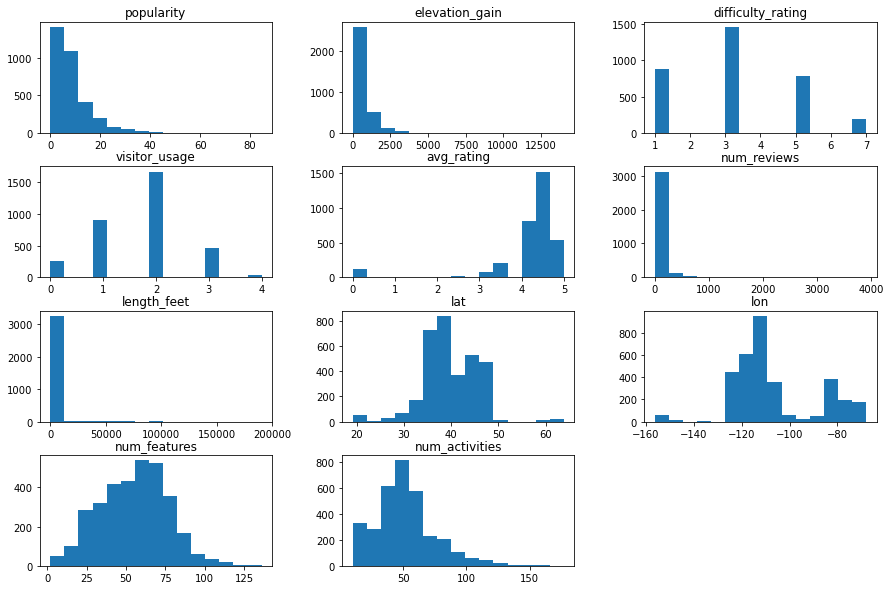

In [27]:
# Create histogram of numeric columns in dataset
trails_cleaned.hist(bins = 15, figsize = (15, 10), grid = False)

Each of these features has a lot outliers.  I think with the nature of each of these features the outliers need to stay as each of the trails are very different.

### Final Dataset

In [28]:
trails_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3313 entries, 0 to 3312
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   trail              3313 non-null   object 
 1   national_park      3313 non-null   object 
 2   city               3313 non-null   object 
 3   state              3313 non-null   object 
 4   popularity         3313 non-null   float64
 5   elevation_gain     3313 non-null   float64
 6   difficulty_rating  3313 non-null   int64  
 7   route_type         3313 non-null   object 
 8   visitor_usage      3313 non-null   float64
 9   avg_rating         3313 non-null   float64
 10  num_reviews        3313 non-null   int64  
 11  features           3313 non-null   object 
 12  activities         3313 non-null   object 
 13  length_feet        3313 non-null   float64
 14  lat                3313 non-null   float64
 15  lon                3313 non-null   float64
 16  num_features       3313 

In [29]:
trails_cleaned.head()

,trail,national_park,city,state,popularity,elevation_gain,difficulty_rating,route_type,visitor_usage,avg_rating,num_reviews,features,activities,length_feet,lat,lon,num_features,num_activities
0,Harding Ice Field Trail,Kenai Fjords National Park,Seward,Alaska,24.8931,1161.8976,5,out and back,3.0,5.0,423,"['dogs-no', 'forest', 'river', 'views', 'water...","['birding', 'camping', 'hiking', 'nature-trips...",1300.831131,60.18852,-149.63156,80,65
1,Mount Healy Overlook Trail,Denali National Park,Denali National Park,Alaska,18.0311,507.7968,3,out and back,1.0,4.5,260,"['dogs-no', 'forest', 'views', 'wild-flowers',...","['birding', 'camping', 'hiking', 'nature-trips...",576.657099,63.73049,-148.91968,58,59
2,Exit Glacier Trail,Kenai Fjords National Park,Seward,Alaska,17.7821,81.9912,1,out and back,3.0,4.5,224,"['dogs-no', 'partially-paved', 'views', 'wildl...","['hiking', 'walking']",241.391344,60.18879,-149.63100,51,21
3,Horseshoe Lake Trail,Denali National Park,Denali National Park,Alaska,16.2674,119.7864,1,loop,2.0,4.5,237,"['dogs-no', 'forest', 'lake', 'kids', 'views',...","['birding', 'hiking', 'nature-trips', 'trail-r...",281.623235,63.73661,-148.91500,74,65
4,Triple Lakes Trail,Denali National Park,Denali National Park,Alaska,12.5935,1124.7120,5,out and back,1.0,4.5,110,"['dogs-no', 'lake', 'views', 'wild-flowers', '...","['birding', 'fishing', 'hiking', 'nature-trips...",2480.966591,63.73319,-148.89682,56,65


**Conclusions:**

* There are a lot of outliers in the features and most are skewed mostly due to the data being user inputted.
    
* Ethical considerations: Most of the information is user input so the data is based on their experiences and data. This can be different from person to person.
    
* Some of the data flagged as duplicates may or may not be actual duplicates.  Without further research on each row flagged it is hard to say if the trail is actually a duplicate or not.

* As I progress with the other data and finally merge all together, there may be more preparation needed.

## Milestone 3: Cleaning/Formatting Website Data

Perform at least 5 data transformation and/or cleansing steps to your website data. The below examples are not required - they are just potential transformations you could do. If your data doesn't work for these scenarios, complete different transformations. You can do the same transformation multiple times if needed to clean your data. The goal is a clean dataset at the end of the milestone.
- Replace Headers
- Format data into a more readable format
- Identify outliers and bad data
- Find duplicates
- Fix casing or inconsistent values
- Conduct Fuzzy Matching

In [30]:
# import librarys
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [31]:
response = requests.get(
   url="https://en.wikipedia.org/wiki/List_of_national_parks_of_the_United_States_by_elevation",
    )

if response.status_code == requests.codes.ok:       
    soup = BeautifulSoup(response.content, 'html.parser')

    title = soup.find(id="firstHeading")
    print(title.string)
else:
    print("Sorry, something went wrong")

List of national parks of the United States by elevation


In [32]:
# Find all wikitables that the elevation data is in
data_tables = soup.find_all("table", {"class": "wikitable"})
print(f"There are {len(data_tables)} tables")

There are 1 tables


In [33]:
# Get table data
elevations_data = data_tables[0]

In [34]:
# Get the header information
elevations_header = [th.getText().strip() for th in elevations_data.find_all('tbody')[0].find_all('th')]
elevations_header

['Rank',
 'Park',
 'Location',
 'Peak name',
 'Mountain range',
 'Elevation',
 'Location of lowest point',
 'Minimum elevation',
 'Vertical relief']

In [35]:
# Get the row information
elevations_rows = elevations_data.tbody.find_all("tr", recursive = False)[1:]
elevations_details = [[td.get_text().strip() for td in tr.find_all('td')] for tr in elevations_rows]

In [36]:
# Put data into a dictionary
elevations_df = pd.DataFrame(elevations_details, columns = elevations_header)
elevations_df.head()

,Rank,Park,Location,Peak name,Mountain range,Elevation,Location of lowest point,Minimum elevation,Vertical relief
0,1,Denali,AK0573,Denali,Alaska Range,"20,310 feet (6,190 m)",Yentna River[1],240 feet (73 m),"20,070 feet (6,120 m)"
1,2,Wrangell-St. Elias,AK0573,Mount Saint Elias,Saint Elias Mountains,"18,008 feet (5,489 m)",Gulf of Alaska,0 feet (0 m),"18,008 feet (5,489 m)"
2,3,Glacier Bay,AK0573,Mount Fairweather,Saint Elias Mountains,"15,300 feet (4,700 m)",Gulf of Alaska,0 feet (0 m),"15,300 feet (4,700 m)"
3,4,Sequoia,CA0621,Mount Whitney,Sierra Nevada,"14,505 feet (4,421 m)",Kaweah River[2],"1,360 feet (410 m)","13,145 feet (4,007 m)"
4,5,Mount Rainier,WA0621,Mount Rainier,Cascade Range,"14,411 feet (4,392 m)",Ohanapecosh River,"1,610 feet (490 m)","12,801 feet (3,902 m)"


In [37]:
def get_feet(string):
    '''
    Pull out feet from string and convert to integer
    
    args:
        string (str): feature string
        
    returns:
        feet (int): feature in feet
    '''
    # split string by spaces
    string_split = string.split()
    
    # use 1st element (feet needed) and then remove ',' and whitespace and convert to int
    feet = string_split[0].replace(',', '').strip()
    
    # if converting feet to numeric fails, convert negative to correct negative and convert
    try:
        feet = int(feet)
    except ValueError:        
        feet = feet.replace('\u2212', '-')
        feet = int(feet)
    
    return feet

### Step 1: Split Elevation and keep feet

In [38]:
# Split Elevation and keep feet
elevations_df['elevation_feet'] = elevations_df['Elevation'].apply(lambda x: get_feet(x))

# Drop Elevation column
elevations_df.drop(['Elevation'], axis = 1, inplace = True)

elevations_df.head()

,Rank,Park,Location,Peak name,Mountain range,Location of lowest point,Minimum elevation,Vertical relief,elevation_feet
0,1,Denali,AK0573,Denali,Alaska Range,Yentna River[1],240 feet (73 m),"20,070 feet (6,120 m)",20310
1,2,Wrangell-St. Elias,AK0573,Mount Saint Elias,Saint Elias Mountains,Gulf of Alaska,0 feet (0 m),"18,008 feet (5,489 m)",18008
2,3,Glacier Bay,AK0573,Mount Fairweather,Saint Elias Mountains,Gulf of Alaska,0 feet (0 m),"15,300 feet (4,700 m)",15300
3,4,Sequoia,CA0621,Mount Whitney,Sierra Nevada,Kaweah River[2],"1,360 feet (410 m)","13,145 feet (4,007 m)",14505
4,5,Mount Rainier,WA0621,Mount Rainier,Cascade Range,Ohanapecosh River,"1,610 feet (490 m)","12,801 feet (3,902 m)",14411


### Step 2: Remove citation from Location of lowest point

In [39]:
import re

def remove_citation(location):
    return re.sub(r'\[\d+\]', '', location)

elevations_df['lowest_point'] = elevations_df['Location of lowest point'].apply(lambda x: remove_citation(x))

# Drop Lowest Point column
#elevations_df.drop(['Location of lowest point'], axis = 1, inplace = True)

elevations_df.head()

,Rank,Park,Location,Peak name,Mountain range,Location of lowest point,Minimum elevation,Vertical relief,elevation_feet,lowest_point
0,1,Denali,AK0573,Denali,Alaska Range,Yentna River[1],240 feet (73 m),"20,070 feet (6,120 m)",20310,Yentna River
1,2,Wrangell-St. Elias,AK0573,Mount Saint Elias,Saint Elias Mountains,Gulf of Alaska,0 feet (0 m),"18,008 feet (5,489 m)",18008,Gulf of Alaska
2,3,Glacier Bay,AK0573,Mount Fairweather,Saint Elias Mountains,Gulf of Alaska,0 feet (0 m),"15,300 feet (4,700 m)",15300,Gulf of Alaska
3,4,Sequoia,CA0621,Mount Whitney,Sierra Nevada,Kaweah River[2],"1,360 feet (410 m)","13,145 feet (4,007 m)",14505,Kaweah River
4,5,Mount Rainier,WA0621,Mount Rainier,Cascade Range,Ohanapecosh River,"1,610 feet (490 m)","12,801 feet (3,902 m)",14411,Ohanapecosh River


### Step 3: Split Minimum elevation and keep feet

In [40]:
# Split Minimum elevation
elevations_df['min_elevation_feet'] = elevations_df['Minimum elevation'].apply(lambda x: get_feet(x))

# Drop Minimum elevation column
elevations_df.drop(['Minimum elevation'], axis = 1, inplace = True)

elevations_df.head()

,Rank,Park,Location,Peak name,Mountain range,Location of lowest point,Vertical relief,elevation_feet,lowest_point,min_elevation_feet
0,1,Denali,AK0573,Denali,Alaska Range,Yentna River[1],"20,070 feet (6,120 m)",20310,Yentna River,240
1,2,Wrangell-St. Elias,AK0573,Mount Saint Elias,Saint Elias Mountains,Gulf of Alaska,"18,008 feet (5,489 m)",18008,Gulf of Alaska,0
2,3,Glacier Bay,AK0573,Mount Fairweather,Saint Elias Mountains,Gulf of Alaska,"15,300 feet (4,700 m)",15300,Gulf of Alaska,0
3,4,Sequoia,CA0621,Mount Whitney,Sierra Nevada,Kaweah River[2],"13,145 feet (4,007 m)",14505,Kaweah River,1360
4,5,Mount Rainier,WA0621,Mount Rainier,Cascade Range,Ohanapecosh River,"12,801 feet (3,902 m)",14411,Ohanapecosh River,1610


### Step 4: Split Vertical Relief and keep feet

In [41]:
# Split Vertical
elevations_df['vertical_relief_feet'] = elevations_df['Vertical relief'].apply(lambda x: get_feet(x))

# Drop Minimum elevation column
elevations_df.drop(['Vertical relief'], axis = 1, inplace = True)

elevations_df.head()

,Rank,Park,Location,Peak name,Mountain range,Location of lowest point,elevation_feet,lowest_point,min_elevation_feet,vertical_relief_feet
0,1,Denali,AK0573,Denali,Alaska Range,Yentna River[1],20310,Yentna River,240,20070
1,2,Wrangell-St. Elias,AK0573,Mount Saint Elias,Saint Elias Mountains,Gulf of Alaska,18008,Gulf of Alaska,0,18008
2,3,Glacier Bay,AK0573,Mount Fairweather,Saint Elias Mountains,Gulf of Alaska,15300,Gulf of Alaska,0,15300
3,4,Sequoia,CA0621,Mount Whitney,Sierra Nevada,Kaweah River[2],14505,Kaweah River,1360,13145
4,5,Mount Rainier,WA0621,Mount Rainier,Cascade Range,Ohanapecosh River,14411,Ohanapecosh River,1610,12801


### Step 5: Rename park to national_park

Rename Park to national_park, Peak name to peak_name, and Mountain range to mtn_range

In [42]:
header_names = {'Park': 'national_park',
                'Peak name': 'peak_name',
                'Mountain range': 'mtn_range'}

elevations_df.rename(columns = header_names, inplace = True)
elevations_df.head()

,Rank,national_park,Location,peak_name,mtn_range,Location of lowest point,elevation_feet,lowest_point,min_elevation_feet,vertical_relief_feet
0,1,Denali,AK0573,Denali,Alaska Range,Yentna River[1],20310,Yentna River,240,20070
1,2,Wrangell-St. Elias,AK0573,Mount Saint Elias,Saint Elias Mountains,Gulf of Alaska,18008,Gulf of Alaska,0,18008
2,3,Glacier Bay,AK0573,Mount Fairweather,Saint Elias Mountains,Gulf of Alaska,15300,Gulf of Alaska,0,15300
3,4,Sequoia,CA0621,Mount Whitney,Sierra Nevada,Kaweah River[2],14505,Kaweah River,1360,13145
4,5,Mount Rainier,WA0621,Mount Rainier,Cascade Range,Ohanapecosh River,14411,Ohanapecosh River,1610,12801


### Step 6: Drop Rank and Location as they are not needed

In [43]:
elevations_df.drop(['Rank'], axis = 1, inplace = True)
elevations_df.drop(['Location'], axis = 1, inplace = True)

elevations_df.head()

,national_park,peak_name,mtn_range,Location of lowest point,elevation_feet,lowest_point,min_elevation_feet,vertical_relief_feet
0,Denali,Denali,Alaska Range,Yentna River[1],20310,Yentna River,240,20070
1,Wrangell-St. Elias,Mount Saint Elias,Saint Elias Mountains,Gulf of Alaska,18008,Gulf of Alaska,0,18008
2,Glacier Bay,Mount Fairweather,Saint Elias Mountains,Gulf of Alaska,15300,Gulf of Alaska,0,15300
3,Sequoia,Mount Whitney,Sierra Nevada,Kaweah River[2],14505,Kaweah River,1360,13145
4,Mount Rainier,Mount Rainier,Cascade Range,Ohanapecosh River,14411,Ohanapecosh River,1610,12801


### Step 7 Get Summary Statistics

In [44]:
# Get column info
elevations_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   national_park             63 non-null     object
 1   peak_name                 63 non-null     object
 2   mtn_range                 63 non-null     object
 3   Location of lowest point  63 non-null     object
 4   elevation_feet            63 non-null     int64 
 5   lowest_point              63 non-null     object
 6   min_elevation_feet        63 non-null     int64 
 7   vertical_relief_feet      63 non-null     int64 
dtypes: int64(3), object(5)
memory usage: 4.1+ KB


In [45]:
# Get summary statistics on numerical data
elevations_df.describe()

,elevation_feet,min_elevation_feet,vertical_relief_feet
count,63.000000,63.000000,63.000000
mean,7257.873016,2006.349206,5251.476190
std,4994.334734,2261.703356,4661.703492
min,9.000000,-282.000000,9.000000
25%,3170.000000,0.000000,1365.500000
50%,7606.000000,900.000000,4720.000000
75%,10327.000000,3638.000000,7533.000000
max,20310.000000,7630.000000,20070.000000


In [46]:
# Get summary statistics on non-numerical data
elevations_df.describe(include = ['O'])

,national_park,peak_name,mtn_range,Location of lowest point,lowest_point
count,63,63,63,63,63
unique,63,63,43,54,52
top,Denali,Denali,,Pacific Ocean,Pacific Ocean
freq,1,1,6,6,6


### Step 8: Check for outliers

array([[<AxesSubplot:title={'center':'elevation_feet'}>,
        <AxesSubplot:title={'center':'min_elevation_feet'}>],
       [<AxesSubplot:title={'center':'vertical_relief_feet'}>,
        <AxesSubplot:>]], dtype=object)

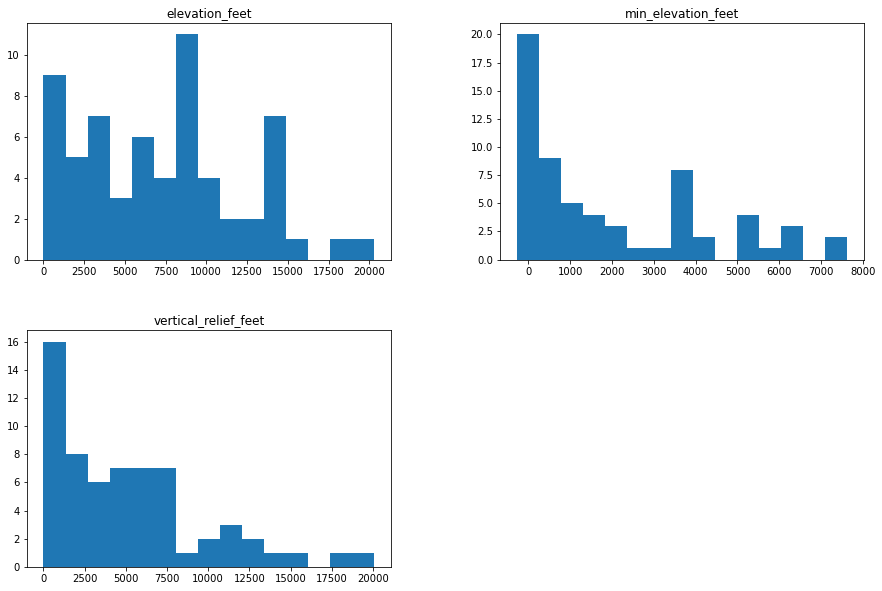

In [47]:
# Create histogram of numeric columns in dataset
elevations_df.hist(bins = 15, figsize = (15, 10), grid = False)

### Final Dataset

In [50]:
elevations_df.head()

,national_park,peak_name,mtn_range,Location of lowest point,elevation_feet,lowest_point,min_elevation_feet,vertical_relief_feet
0,Denali,Denali,Alaska Range,Yentna River[1],20310,Yentna River,240,20070
1,Wrangell-St. Elias,Mount Saint Elias,Saint Elias Mountains,Gulf of Alaska,18008,Gulf of Alaska,0,18008
2,Glacier Bay,Mount Fairweather,Saint Elias Mountains,Gulf of Alaska,15300,Gulf of Alaska,0,15300
3,Sequoia,Mount Whitney,Sierra Nevada,Kaweah River[2],14505,Kaweah River,1360,13145
4,Mount Rainier,Mount Rainier,Cascade Range,Ohanapecosh River,14411,Ohanapecosh River,1610,12801


**Conclusions:**

* There are a lot of outliers in the features and most are skewed mostly due to the data being user inputted.
    
* Ethical considerations: This data is maintained by "the people". Although it is monitored, there may be inaccurate information on the table within Wikipedia.

* As I progress with the other data and finally merge all together, there may be more preparation needed.